In [1]:
import lofarSun.BF.bftools as bftools
from lofarSun.BF.lofarJ2000xySun import j2000xy
import os,h5py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%load_ext autoreload
%autoreload 2

In [2]:
fname = r'/wrk-kappa/group/corona/radio/LC4_SPECTRA/L401015_SAP000_B000_S0_P000_bf.h5'
out_dir=r'../tmpdata'
t_ratio_start = 0.81 # time ratio of the starting time
t_ratio_end =0.84 # time ratio of the ending time

t_c_ratio = 24 # time compression ratio
f_c_ratio = 2 # frequency compression ratio

# automatically get the paths for H5
h5_absolute = os.path.abspath(fname)
h5_dir = os.path.dirname(h5_absolute)
h5_fname = os.path.basename(h5_absolute)
out_dir = os.path.abspath(out_dir)
os.chdir(h5_dir)
f = h5py.File(h5_fname, 'r')

(dataset_uri, coordinates_uri, beam_key, stokes_key, pointing_ra, pointing_dec, tsamp, 
        project_id, obs_id, antenna_set_name, telescop_name, target_name, t_idx_count, f_idx_count,
        t_start_bf, t_end_bf, freq, t_all)= bftools.h5_fetch_meta(f)

data_fits, t_fits = bftools.downsample_h5_seg_by_time_ratio(
            f[dataset_uri], t_all, t_ratio_start, t_ratio_end, t_idx_count,
            t_c_ratio=t_c_ratio, f_c_ratio=f_c_ratio)

f_fits = bftools.avg_1d(freq, f_c_ratio)

In [3]:
print(dataset_uri, coordinates_uri, beam_key, stokes_key, pointing_ra, pointing_dec, tsamp)

/SUB_ARRAY_POINTING_000/BEAM_000/STOKES_0 /SUB_ARRAY_POINTING_000/BEAM_000/COORDINATES/COORDINATE_1 BEAM_000 STOKES_0 0.0 0.0 0.01048576


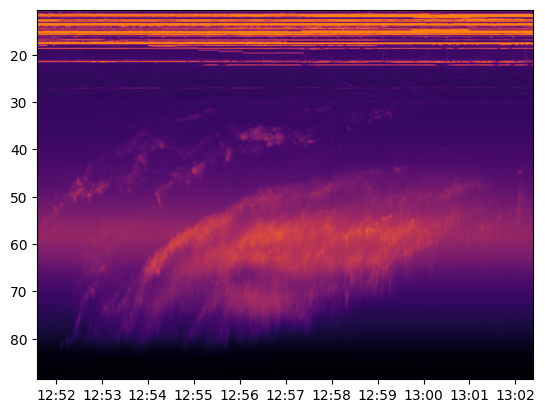

In [4]:
plt.imshow(np.log10(data_fits.T), aspect='auto', 
                        extent=[(t_fits[0]), (t_fits[-1]), 
                        f_fits[-1],f_fits[0]], cmap='inferno')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
plt.gca().xaxis_date()

In [7]:
pointing_x, pointing_y = j2000xy(pointing_ra, pointing_dec, mdates.num2date(t_fits[0]))
full_hdu = bftools.cook_fits_spectr_hdu(data_fits, t_fits, f_fits, mdates.num2date(t_fits[0]), 
                                        mdates.num2date(t_fits[-1]), stokes_key,
                                 antenna_set_name, telescop_name, target_name,
                                 pointing_ra, pointing_dec, pointing_x, pointing_y)

# then save the fits file
# full_hdu.writeto(out_dir+"/test_fits.fits", overwrite=True)

In [8]:
print(mdates.num2date(t_fits[0]), mdates.num2date(t_fits[-1])) # time range

2015-10-16 12:51:35.839840+00:00 2015-10-16 13:02:23.356806+00:00
